In [ ]:
# installing libraries

!pip install scikit-survival
!pip install xgboost
!pip install pycox
!pip install torchtuples

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 902.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.4
    Uninstalling osqp-1.0.4:
      Successfully uninstalled osqp-1.0.4
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving PV_data_clean.csv to PV_data_clean.csv


{'PV_data_clean.csv': b'randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,snow_production_level,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurr_bin_ticket_minutes,hurr_affected_assets,hurr_production_level,HurricanePrep,HurricanePostInspection,hurricane,nearest_hurricane,wind_speed_mean,rain_value_mm,nearest_rain,storm_active_tickets,storm_bin_ticket_minutes,storm_affected_assets,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain,weather_onset\nC2S1,2018-08-01,West,T6,H4,large,23.0,No,None,None,Unknown,0.528308638457483,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,354,6.79504166666667,0.0,13,No,None,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0,0\nC2S1,2018-08-02,West,T6,H4,large,23.0,No,None,None,Unknown,0.720385011561469,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,354,6.85410416666667,0.0,14,No,None,

In [ ]:
df = pd.read_csv("PV_data_clean.csv")
df.head(5)

/tmp/ipython-input-32-440117012.py:1: DtypeWarning: Columns (8,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("PV_data_clean.csv")


randid        Date NOAAClimRegion TempZone HumidZone bin_PlantSize_kW  \
0   C2S1  2018-08-01           West       T6        H4            large   
1   C2S1  2018-08-02           West       T6        H4            large   
2   C2S1  2018-08-03           West       T6        H4            large   
3   C2S1  2018-08-04           West       T6        H4            large   
4   C2S1  2018-08-05           West       T6        H4            large   

   plant_age_months active_snow_tickets snow_bin_ticket_minutes  \
0              23.0                  No                     NaN   
1              23.0                  No                     NaN   
2              23.0                  No                     NaN   
3              23.0                  No                     NaN   
4              23.0                  No                     NaN   

  snow_affected_assets snow_production_level        PR  snow_value_mm  \
0                  NaN               Unknown  0.528309            0.0   
1                  NaN               Unknown  0.720385            0.0   
2                  NaN               Unknown  0.732191            0.0   
3                  NaN               Unknown  0.733979            0.0   
4                  NaN               Unknown  0.728649            0.0   

   total_daily_snow_mm  low_irradiation  cumulative_snow_mm  \
0                  0.0                0                 0.0   
1                  0.0                0                 0.0   
2                  0.0                0                 0.0   
3                  0.0                0                 0.0   
4                  0.0                0                 0.0   

  hurr_bin_ticket_minutes hurr_affected_assets hurr_production_level  \
0                     NaN                  NaN               Unknown   
1                     NaN                  NaN               Unknown   
2                     NaN                  NaN               Unknown   
3                     NaN                  NaN               Unknown   
4                     NaN                  NaN               Unknown   

  HurricanePrep HurricanePostInspection  hurricane  nearest_hurricane  \
0            No                      No        0.0                354   
1            No                      No        0.0                354   
2            No                      No        0.0                354   
3            No                      No        0.0                354   
4            No                      No        0.0                354   

   wind_speed_mean  rain_value_mm  nearest_rain storm_active_tickets  \
0         6.795042            0.0            13                   No   
1         6.854104            0.0            14                   No   
2         6.453604            0.0            15                   No   
3         5.954604            0.0            16                   No   
4         6.222104            0.0            17                   No   

  storm_bin_ticket_minutes storm_affected_assets storm_production_level  \
0                      NaN                   NaN                Unknown   
1                      NaN                   NaN                Unknown   
2                      NaN                   NaN                Unknown   
3                      NaN                   NaN                Unknown   
4                      NaN                   NaN                Unknown   

   lightning  storm  duration_minutes_storm  nearest_storm  flood  \
0          0    0.0                       0           2420    0.0   
1          0    0.0                       0           2420    0.0   
2          0    0.0                       0           2420    0.0   
3          0    0.0                       0           2420    0.0   
4          0    0.0                       0           2420    0.0   

   duration_minutes_flood  nearest_flood  rain  weather_onset  
0                       0           2255   0.0              0  
1                       0      

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Identify recovery episodes
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.fillna(0)

# baseline PR as the median during calm days
baseline_pr = df[df['weather_onset'] == 0]['PR'].median()
recovery_threshold = baseline_pr

episodes = []

for randid, group in df.groupby('randid'):
    group = group.sort_values('Date').reset_index(drop=True)

    for i in range(len(group)):
        if group.loc[i, 'weather_onset'] > 0:
            event_start = group.loc[i, 'Date']
            start_index = i

            # skip if no PR drop in the next 2 days
            if group.loc[i:i+2, 'PR'].min() >= baseline_pr:
                continue

            recovered = False

            # find 3 consec days with PR ≥ baseline
            for j in range(i + 1, len(group) - 2):
                recovery_window = group.loc[j:j+2, 'PR']

                if (recovery_window >= baseline_pr).all():
                    duration = (group.loc[j, 'Date'] - event_start).days
                    snapshot = group.loc[i]
                    episodes.append({
                        'randid': randid,
                        'start_date': event_start,
                        'duration': duration,
                        'event_observed': 1,
                        **snapshot.drop(['PR', 'Date']).to_dict()
                    })
                    recovered = True
                    break

            # censored - no recovery found until end
            if not recovered:
                duration = (group.iloc[-1]['Date'] - event_start).days
                snapshot = group.loc[i]
                episodes.append({
                    'randid': randid,
                    'start_date': event_start,
                    'duration': duration,
                    'event_observed': 0,
                    **snapshot.drop(['PR', 'Date']).to_dict()
                })


/tmp/ipython-input-33-731009610.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for randid, group in df.groupby('randid'):


In [ ]:
episodes_df = pd.DataFrame(episodes)
episodes_df

randid start_date  duration  event_observed NOAAClimRegion TempZone  \
0      C2S1 2018-10-13         1               1           West       T6   
1      C2S1 2018-11-22         3               1           West       T6   
2      C2S1 2018-11-29         3               1           West       T6   
3      C2S1 2018-11-30         2               1           West       T6   
4      C2S1 2018-12-05         2               1           West       T6   
...     ...        ...       ...             ...            ...      ...   
7266   P2S1 2019-03-08         3               1           West       T1   
7267   P2S1 2019-03-20        10               1           West       T1   
7268   P2S1 2019-03-21         9               1           West       T1   
7269   P2S1 2019-03-22         8               1           West       T1   
7270   P2S1 2019-03-24         6               1           West       T1   

     HumidZone bin_PlantSize_kW  plant_age_months active_snow_tickets  \
0           H4            large              25.0                  No   
1           H4            large              27.0                  No   
2           H4            large              27.0                  No   
3           H4            large              27.0                  No   
4           H4            large              27.0                  No   
...        ...              ...               ...                 ...   
7266        H2            large               2.0                  No   
7267        H2            large               2.0                  No   
7268        H2            large               2.0                  No   
7269        H2            large               2.0                  No   
7270        H2            large               3.0                  No   

     snow_bin_ticket_minutes snow_affected_assets snow_production_level  \
0                        NaN                  NaN               Unknown   
1                        NaN                  NaN               Unknown   
2                        NaN                  NaN               Unknown   
3                        NaN                  NaN               Unknown   
4                        NaN                  NaN               Unknown   
...                      ...                  ...                   ...   
7266                     NaN                  NaN               Unknown   
7267                     NaN                  NaN               Unknown   
7268                     NaN                  NaN               Unknown   
7269                     NaN                  NaN               Unknown   
7270                     NaN                  NaN               Unknown   

      snow_value_mm  total_daily_snow_mm  low_irradiation  cumulative_snow_mm  \
0               0.0                  0.0                0                 0.0   
1               0.0                  0.0                0                 0.0   
2               0.0                  0.0                1                 0.0   
3               0.0                  0.0                1                 0.0   
4               0.0                  0.0                1                 0.0   
...             ...                  ...              ...                 ...   
7266            0.0                  0.0                0                 0.0   
7267            0.0                  0.0                0                 0.0   
7268            0.0                  0.0                0                 0.0   
7269            0.0                  0.0                0                 0.0   
7270            0.0                  0.0                0                 0.0   

     hurr_bin_ticket_minutes hurr_affected_assets hurr_production_level  \
0                        NaN                  NaN               Unknown   
1                        NaN                  NaN               Unknown   
2                        NaN                  NaN               Unknown   
3                        NaN             

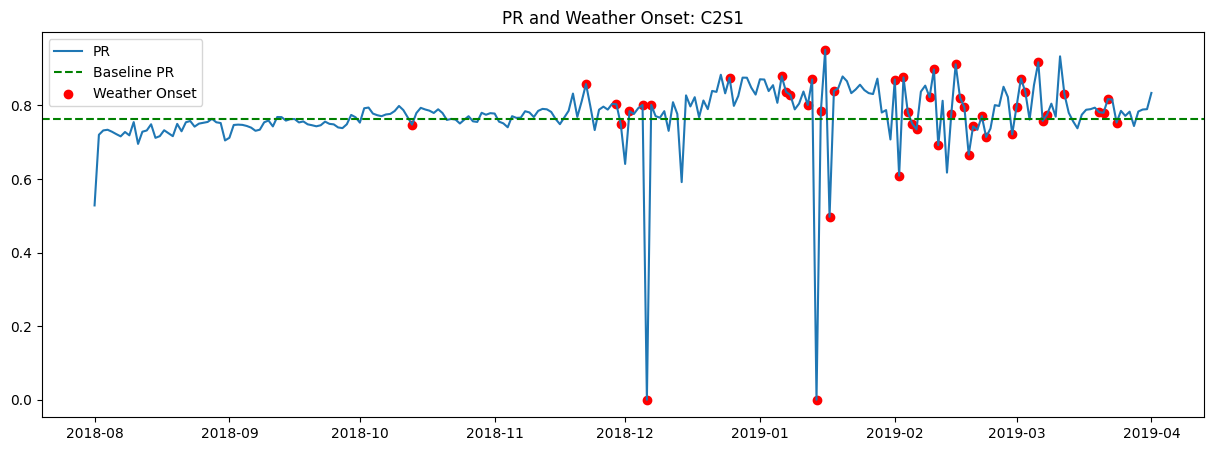

In [ ]:
#testing recovery

sample_id = df['randid'].unique()[0]
df_sample = df[df['randid'] == sample_id]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df_sample['Date'], df_sample['PR'], label='PR')
plt.axhline(baseline_pr, color='green', linestyle='--', label='Baseline PR')
plt.scatter(df_sample[df_sample['weather_onset'] > 0]['Date'],
            df_sample[df_sample['weather_onset'] > 0]['PR'],
            color='red', label='Weather Onset')
plt.legend()
plt.title(f'PR and Weather Onset: {sample_id}')
plt.show()


In [ ]:
print(episodes_df['event_observed'].value_counts())
print(episodes_df['duration'].describe())
# About 77% of weather events led to recovery, while 23% were censored
# distribution looks healthy

event_observed
1    5575
0    1696
Name: count, dtype: int64
count    7271.000000
mean       37.008527
std        54.650236
min         0.000000
25%         3.000000
50%        10.000000
75%        46.000000
max       272.000000
Name: duration, dtype: float64


In [ ]:
episodes_df.to_csv("/content/drive/MyDrive/survival_episodes_cleaned.csv", index=False)